In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [2]:
import datetime
import datetime as dt

dt.datetime.strptime('07/06/2015 10:58:27 AM', '%m/%d/%Y %I:%M:%S %p')
#datetime.datetime(2015, 7, 6, 0, 0)
parser = lambda date: pd.datetime.strptime(date, '%m/%d/%Y %H:%M:%S')

In [3]:
df = pd.read_csv("311-2015.csv", low_memory=False, parse_dates=[1], dtype=str , nrows=200000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 53 columns):
Unique Key                        200000 non-null object
Created Date                      200000 non-null datetime64[ns]
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Address Type                

In [5]:
df.index = df['Created Date']

In [6]:
del df['Created Date']

In [7]:
df.head(2)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773539552542,-73.78823697228408,"(40.773539552542, -73.78823697228408)"
2015-07-03 13:26:29,30997660,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.76702142171206,-73.97944780718524,"(40.76702142171206, -73.97944780718524)"


What was the **most popular type of complaint**, and how many times was it filed?

In [8]:
df['Complaint Type'].value_counts().head(1)

Blocked Driveway    21779
Name: Complaint Type, dtype: int64

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

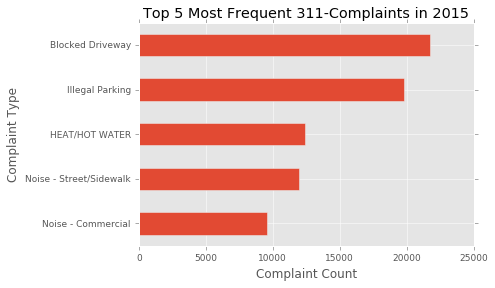

In [9]:
ax = df['Complaint Type'].value_counts().sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(6,4), fontsize=9)
ax.set_title("Top 5 Most Frequent 311-Complaints in 2015")
ax.set_xlabel("Complaint Count")
ax.set_ylabel("Complaint Type")
plt.savefig("5 Most Frequent 311 Complaints in 2015.svg", bbox_inches='tight')
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [10]:
df_summed_complaints = df['Borough'].value_counts()
summed_complaints = pd.DataFrame(df_summed_complaints)
summed_complaints.reset_index(inplace=True)
summed_complaints.columns = ['Borough', 'Complaint Count']

In [11]:
Borough_head_count = pd.read_csv("NYC_Boroughs.csv")

In [12]:
summed_complaints_merged = summed_complaints.merge(Borough_head_count, left_on='Borough', right_on='borough name')

In [13]:
del summed_complaints_merged['borough name']

In [14]:
summed_complaints_merged

,Borough,Complaint Count,abbreviation,Total
0,BROOKLYN,57129,K,983769
1,QUEENS,46824,Q,1134064
2,MANHATTAN,42050,NY,748583
3,BRONX,29610,BX,456847
4,Unspecified,17000,NaN,0
5,STATEN ISLAND,7387,R,304250


In [15]:
summed_complaints_merged['Per Capita'] = summed_complaints_merged['Total'] / summed_complaints_merged['Complaint Count']

In [16]:
summed_complaints_merged['Per Capita'].sort_values(ascending=False)
summed_complaints_merged[['Borough', 'Per Capita']]

,Borough,Per Capita
0,BROOKLYN,17.220133
1,QUEENS,24.219716
2,MANHATTAN,17.802212
3,BRONX,15.428808
4,Unspecified,0.000000
5,STATEN ISLAND,41.187221


In [17]:
Sorted_complaints = summed_complaints_merged.sort_values(by='Per Capita', ascending=False)

In [18]:
Sorted_complaints

,Borough,Complaint Count,abbreviation,Total,Per Capita
5,STATEN ISLAND,7387,R,304250,41.187221
1,QUEENS,46824,Q,1134064,24.219716
2,MANHATTAN,42050,NY,748583,17.802212
0,BROOKLYN,57129,K,983769,17.220133
3,BRONX,29610,BX,456847,15.428808
4,Unspecified,17000,NaN,0,0.000000


According to your selection of data, **how many cases were filed in March?** How about May?

In [19]:
df['2015-03']['Unique Key'].count()

15025

In [20]:
df['2015-05']['Unique Key'].count()

49715

I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [21]:
df['2015-04-01']['Unique Key'].count()

573

What was the most popular type of complaint on April 1st?

In [22]:
df['2015-04-01']['Complaint Type'].value_counts().head(1)

Illegal Parking    67
Name: Complaint Type, dtype: int64

What were the **most popular three types of complaint** on April 1st

In [23]:
df['2015-04-01']['Complaint Type'].value_counts().head(3)

Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64

**What month has the most reports filed?** How many? Graph it.

In [24]:
#PANDAS resample: http://stackoverflow.com/questions/17001389/pandas-resample-documentation/17001474#17001474

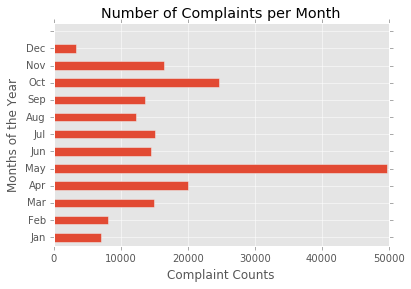

In [25]:
ax = df.resample('M')['Unique Key'].count().plot(kind='barh')
#ax.set_yticks(['2015-01-31 00:00:00, 2015-02-28 00:00:00, 2015-03-30 00:00:00, 2015-04-30 00:00:00, 2015-05-31 00:00:00, 2015-06-30 00:00:00, 2015-07-31 00:00:00, 2015-08-31 00:00:00, 2015-09-30 00:00:00, 2015-10-31 00:00:00, 2015-11-30 00:00:00, 2015-12-31 00:00:00'])
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('Number of Complaints per Month')
ax.set_ylabel('Months of the Year')
ax.set_xlabel('Complaint Counts')

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [26]:
df_week_count = df.resample('W')['Unique Key'].count()

In [27]:
df_week_count = pd.DataFrame(df_week_count)

In [28]:
df_week_count.sort_values(by='Unique Key', ascending=False).head(5)

,Unique Key
Created Date,
2015-05-10,13559
2015-05-17,11683
2015-05-24,10351
2015-05-03,10184
2015-05-31,9387


Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [29]:
df['Noise'] = df['Complaint Type'].str.contains('Noise')
df_noise = df[df['Noise'] == True]

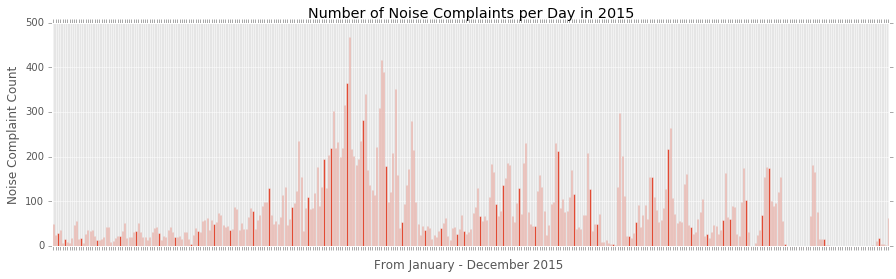

In [30]:
ax = df_noise.resample('D')['Unique Key'].count().plot(kind='bar', figsize=(15,4))
ax.set_xticklabels('')
ax.set_title('Number of Noise Complaints per Day in 2015')
ax.set_ylabel('Noise Complaint Count')
ax.set_xlabel('From January - December 2015 ')

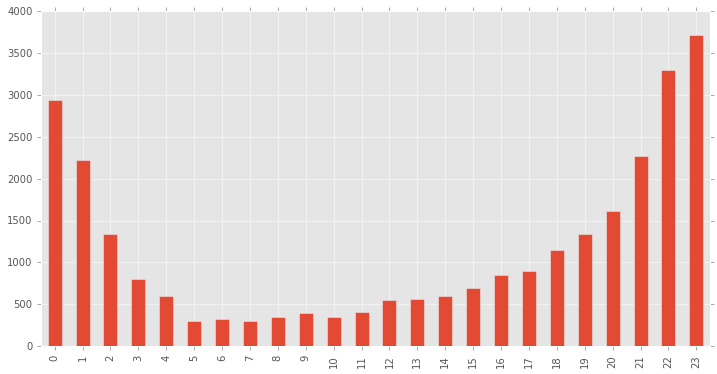

In [31]:
df_noise.groupby(by=df_noise.index.hour)['Unique Key'].count().plot(kind='bar', figsize=(12,6))

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

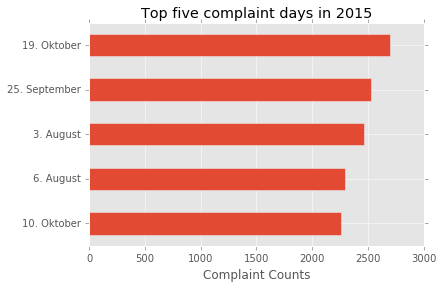

In [32]:
df_day_count = df.resample('D')['Unique Key'].count()
df_day_count = pd.DataFrame(df_day_count)
ax = df_day_count.sort_values(by='Unique Key', ascending=True).tail(5).plot(kind='barh', legend=False)
ax.set_yticklabels(['10. Oktober', '6. August', '3. August', '25. September', '19. Oktober'])
ax.set_title('Top five complaint days in 2015')
ax.set_ylabel('')
ax.set_xlabel('Complaint Counts')
plt.savefig("Top 5 Complaint Days", bbox_inches='tight')

**What hour of the day are the most complaints?** Graph a day of complaints.

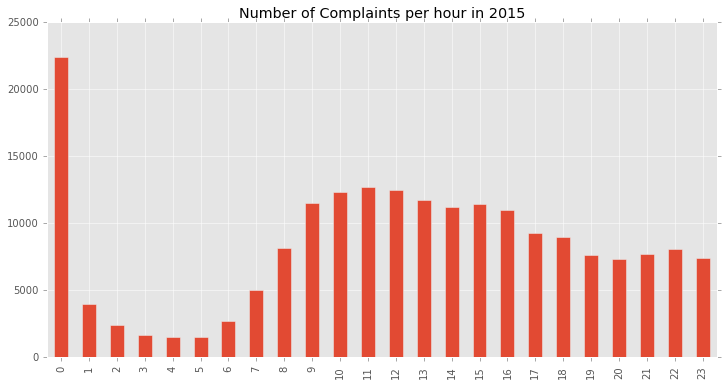

In [33]:
ax = df.groupby(by=df.index.hour)['Unique Key'].count().plot(kind='bar', figsize=(12,6))
ax.set_title('Number of Complaints per hour in 2015')

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [34]:
df.groupby(by=df.index.hour)['Complaint Type'].value_counts().head(2)

   Complaint Type
0  HEAT/HOT WATER    4534
   Rodent            2112
Name: Complaint Type, dtype: int64

In [35]:
df_complaint_type_count_per_hour = df.groupby(by=df.index.hour)['Complaint Type'].value_counts()

In [36]:
Top_complaints_by_hour = pd.DataFrame(df_complaint_type_count_per_hour)

In [37]:
Top_complaints_by_hour['Complaint Type'][0].head(1)

Complaint Type
HEAT/HOT WATER    4534
Name: Complaint Type, dtype: int64

In [38]:
Top_complaints_by_hour['Complaint Type'][1].head(1)

Complaint Type
Noise - Commercial    1025
Name: Complaint Type, dtype: int64

In [39]:
Top_complaints_by_hour['Complaint Type'][23].head(1)

Complaint Type
Noise - Street/Sidewalk    1599
Name: Complaint Type, dtype: int64

In [40]:
#More Reading: http://pandas.pydata.org/pandas-docs/version/0.13.1/timeseries.html

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [41]:
df.groupby(by=df.index.hour == 0)['Unique Key'].count()

False    177573
True      22427
Name: Unique Key, dtype: int64

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [42]:
df['Agency'].value_counts().head(5)

NYPD     80000
HPD      39388
DOT      22308
DPR      15505
DOHMH     8250
Name: Agency, dtype: int64

In [43]:
df['Agency Name'].value_counts().head(5)

New York City Police Department                       80000
Department of Housing Preservation and Development    39363
Department of Transportation                          22308
Department of Parks and Recreation                    15128
Department of Health and Mental Hygiene                8216
Name: Agency Name, dtype: int64

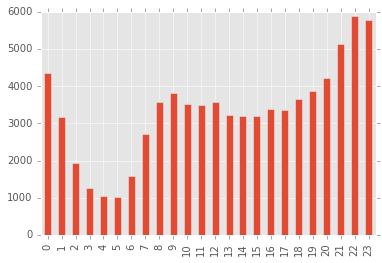

In [44]:
df_NYPD = df[df['Agency Name'] == 'New York City Police Department']
df_NYPD.groupby(by=df_NYPD.index.hour)['Unique Key'].count().plot(kind='bar')

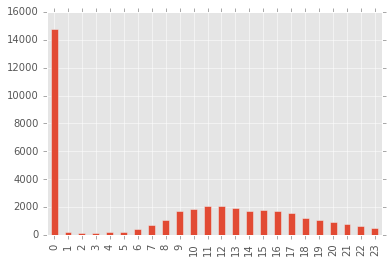

In [45]:
df_HPD = df[df['Agency Name'] == 'Department of Housing Preservation and Development']
df_HPD.groupby(by=df_HPD.index.hour)['Unique Key'].count().plot(kind='bar')

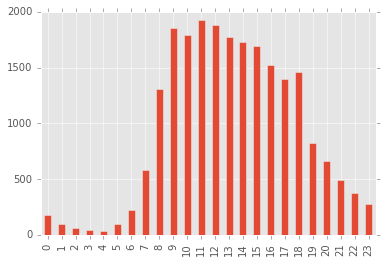

In [46]:
df_DOT = df[df['Agency Name'] == 'Department of Transportation']
df_DOT.groupby(by=df_DOT.index.hour)['Unique Key'].count().plot(kind='bar')

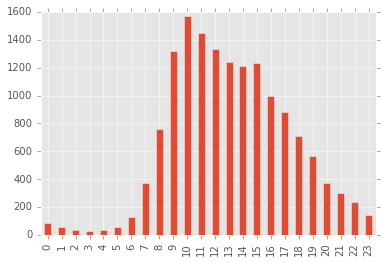

In [47]:
df_DPR = df[df['Agency Name'] == 'Department of Parks and Recreation']
df_DPR.groupby(by=df_DPR.index.hour)['Unique Key'].count().plot(kind='bar')

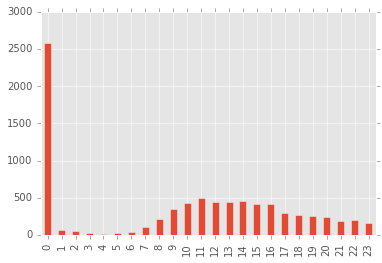

In [48]:
df_DOHMH = df[df['Agency Name'] == 'Department of Health and Mental Hygiene']
df_DOHMH.groupby(by=df_DOHMH.index.hour)['Unique Key'].count().plot(kind='bar')

df_NYPD = df[df['Agency Name'] == 'New York City Police Department']
df_NYPD.groupby(by=df_NYPD.index.hour)['Unique Key'].count().plot(kind='bar')

# Dont understand why I can't change the labels here:

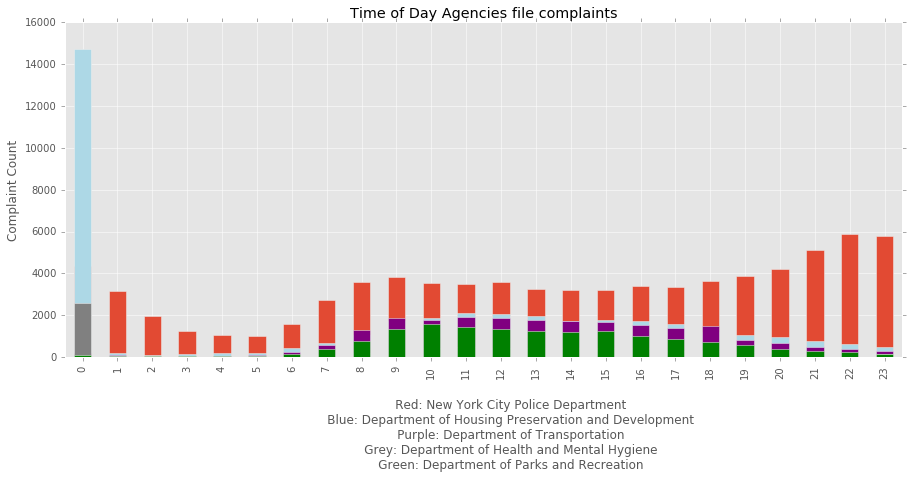

In [49]:
ax = df[df['Agency Name'] == 'New York City Police Department'].groupby(by=df_NYPD.index.hour)['Unique Key'].count().plot(kind='bar', stacked=True, figsize=(15,6))
df[df['Agency Name'] == 'Department of Housing Preservation and Development'].groupby(by=df_HPD.index.hour)['Unique Key'].count().plot(kind='bar', ax=ax, stacked=True, color='lightblue')
df[df['Agency Name'] == 'Department of Transportation'].groupby(by=df_DOT.index.hour)['Unique Key'].count().plot(kind='bar', ax=ax, stacked=True, color='purple')
df[df['Agency Name'] == 'Department of Health and Mental Hygiene'].groupby(by=df_DOHMH.index.hour)['Unique Key'].count().plot(kind='bar', ax=ax, stacked=True, color='grey')
df[df['Agency Name'] == 'Department of Parks and Recreation'].groupby(by=df_DPR.index.hour)['Unique Key'].count().plot(kind='bar', ax=ax, stacked=True, color='green')
ax.set_title('Time of Day Agencies file complaints')
ax.set_ylabel('Complaint Count')
ax.set_xlabel("""
              Red: New York City Police Department
              Blue: Department of Housing Preservation and Development
              Purple: Department of Transportation
              Grey: Department of Health and Mental Hygiene
              Green: Department of Parks and Recreation""")
plt.savefig("Time of Day Agencies File Complaints.svg", bbox_inches='tight')


Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

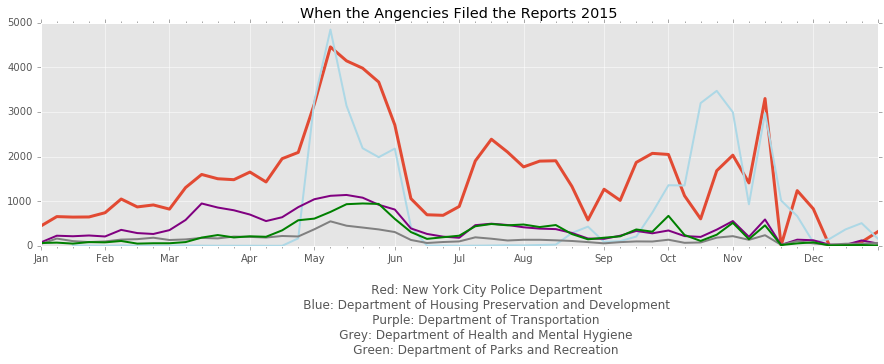

In [50]:
ax = df[df['Agency Name'] == 'New York City Police Department'].resample('W')['Agency'].count().plot(figsize=(15,4), linewidth=3)
df[df['Agency Name'] == 'Department of Housing Preservation and Development'].resample('W')['Agency'].count().plot(color='lightblue', linewidth=2)
df[df['Agency Name'] == 'Department of Transportation'].resample('W')['Agency'].count().plot(color='purple', linewidth=2)
df[df['Agency Name'] == 'Department of Health and Mental Hygiene'].resample('W')['Agency'].count().plot(color='grey', linewidth=2)
df[df['Agency Name'] == 'Department of Parks and Recreation'].resample('W')['Agency'].count().plot(color='green', linewidth=2)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('When the Angencies Filed the Reports 2015')
ax.set_xlabel("""
              Red: New York City Police Department
              Blue: Department of Housing Preservation and Development
              Purple: Department of Transportation
              Grey: Department of Health and Mental Hygiene
              Green: Department of Parks and Recreation""")
plt.savefig("When the Angencies Filed the Reports 2015.svg", bbox_inches='tight')

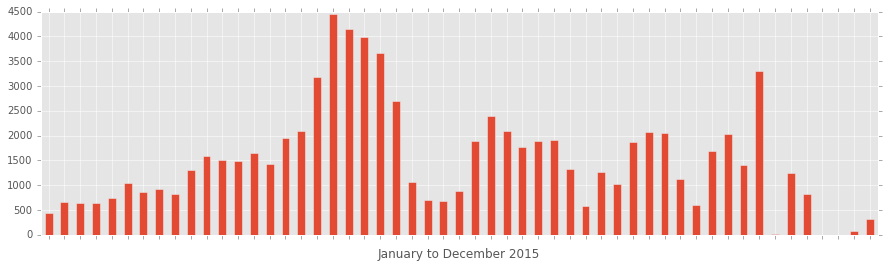

In [51]:
ax = df_NYPD.resample('W')['Agency'].count().plot(kind='bar', figsize=(15,4))
ax.set_xticklabels([''])
ax.set_xlabel('January to December 2015')

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [52]:
df['2015-08']['Complaint Type'].value_counts().head(3)

Noise - Street/Sidewalk    1467
Illegal Parking            1456
Blocked Driveway           1369
Name: Complaint Type, dtype: int64

In [53]:
df['2015-07']['Complaint Type'].value_counts().head(3)

Illegal Parking            1988
Blocked Driveway           1889
Noise - Street/Sidewalk    1698
Name: Complaint Type, dtype: int64

In [54]:
df['2015-05']['Complaint Type'].value_counts().head(3)

Blocked Driveway    4114
Illegal Parking     3975
HEAT/HOT WATER      3583
Name: Complaint Type, dtype: int64